<a href="https://colab.research.google.com/github/gurusurya946/FML/blob/main/dataset_phising_urls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [34]:
data=pd.read_csv('dataset_phishing.csv')


In [42]:

data.head()


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [41]:
data.isnull().sum()


url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [46]:
X=data.drop('status',axis=1).values
X=data.drop('url',axis=1).values
y=data['status'].values
print(y)
print(X)

[0 1 1 ... 0 0 1]
[[ 37.  19.   0. ...   1.   4.   0.]
 [ 77.  23.   1. ...   1.   2.   1.]
 [126.  50.   1. ...   1.   0.   1.]
 ...
 [105.  16.   1. ...   1.  10.   0.]
 [ 38.  30.   0. ...   0.   4.   0.]
 [477.  14.   1. ...   1.   0.   1.]]


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
data['status'].fillna(data['status'].mode()[0],inplace=True)
data['status']=data['status'].replace('legitimate',0)
data['status']=data['status'].replace('phishing',1)



In [91]:
X_train.reshape(-1,1)
y_train.reshape(-1,1)
reg=LogisticRegression(C=0.5)
reg.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5)

In [92]:
reg.coef_
     

array([[ 1.86480326e-02,  5.60796127e-03,  1.12694031e-04,
         6.10975468e-04, -1.05495547e-04,  2.20531149e-05,
         9.83522090e-05,  1.02954248e-04,  0.00000000e+00,
         1.90471241e-04,  5.91117122e-05,  1.57814093e-06,
         3.61661634e-05,  1.08307862e-03,  5.35022188e-07,
         1.90597288e-04,  2.43588156e-06,  4.57361227e-05,
         1.17052066e-06,  2.10631699e-06, -1.36227843e-04,
         6.12466650e-05,  5.11248325e-06,  9.08525929e-06,
         1.48470288e-04,  3.39504309e-05,  2.23955932e-05,
         8.70891947e-08,  6.45914257e-07,  2.70277754e-05,
         3.94509347e-05,  1.83022186e-05,  4.15202656e-04,
         1.08263812e-04,  1.90368039e-05,  6.43986020e-05,
         1.02303067e-07,  9.41281134e-05,  2.80400788e-06,
         1.65462405e-03,  3.51169381e-04,  4.86721859e-04,
         1.62937244e-03,  6.39926279e-04,  5.57916610e-03,
         2.24963352e-03,  5.13044498e-03,  1.71949634e-03,
         1.88035326e-03,  1.90676102e-03,  2.98653623e-0

In [93]:
reg.intercept_scaling

1

In [94]:
reg.predict_proba(X_train)
     

array([[0.14411936, 0.85588064],
       [0.53210426, 0.46789574],
       [0.19166716, 0.80833284],
       ...,
       [0.35245724, 0.64754276],
       [0.36879152, 0.63120848],
       [0.64047276, 0.35952724]])

In [95]:
y_predict=reg.predict(X_test)
print(y_predict)

[0 0 0 ... 1 1 1]


In [96]:
reg.score(X_test, y_test)

0.7876137158852344

In [97]:
confusion_matrix(y_test,y_predict)

array([[1111,  311],
       [ 296, 1140]])

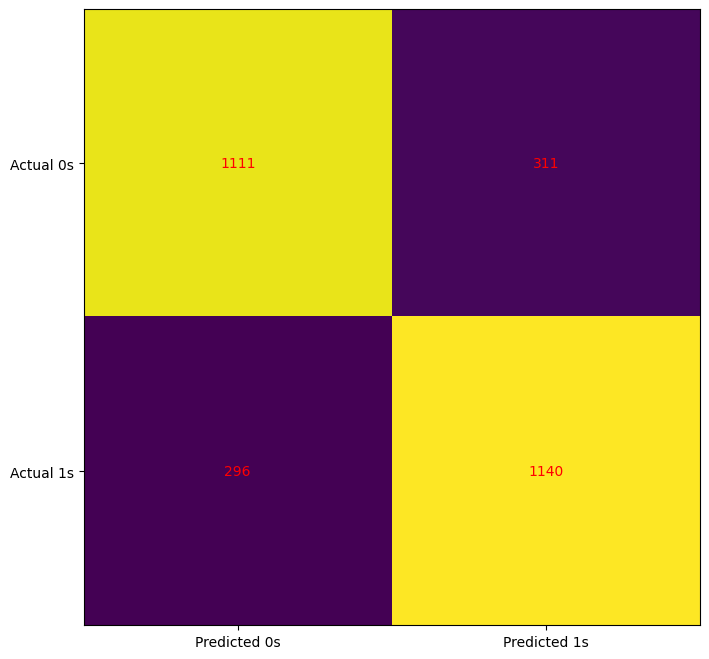

In [98]:
cm=confusion_matrix(y_test,y_predict)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [99]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1422
           1       0.79      0.79      0.79      1436

    accuracy                           0.79      2858
   macro avg       0.79      0.79      0.79      2858
weighted avg       0.79      0.79      0.79      2858

